In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
gal_data = pd.read_csv('/mnt/c/Synced/Projects/AGNs/Project/SDSS.csv') # Same query as before
''' SQL Query (WISE)
SELECT
s.plate, s.mjd, s.fiberid, s.z as redshift, g.subclass,
w.w1mpro as w1, w.w2mpro as w2, w.w3mpro as w3, w.w1flux, w.w2flux, w.w3flux
FROM SpecObjAll AS s
JOIN GalSpecInfo AS g ON s.specobjid = g.specobjid 
JOIN GalSpecLine AS l ON s.specobjid = l.specobjid	
JOIN wise_xmatch AS x ON s.bestobjid = x.sdss_objid
JOIN wise_allsky AS w ON x.wise_cntr = w.cntr
WHERE s.class = "GALAXY"
AND s.z < 0.35
AND (l.sigma_balmer * 2.355) < 500
AND x.match_dist <= 3
AND w.w1snr > 5
AND w.w2snr > 5
AND w.w3snr > 5
AND w.w1flux/w.w1sigflux > 5
AND w.w2flux/w.w2sigflux > 5
AND w.w3flux/w.w3sigflux > 5
'''
gal_data_wise = pd.read_csv('/mnt/c/Synced/Projects/AGNs/Project/WISE.csv')

In [8]:
# Let's cross math plate, mjd, fiberid between the 2 dataframes
crossmatched = pd.merge(gal_data, gal_data_wise, on=['plate', 'mjd', 'fiberid'])
# Only some 2000 bois left now

Text(0, 0.5, '[3.4] - [4.6] in mag')

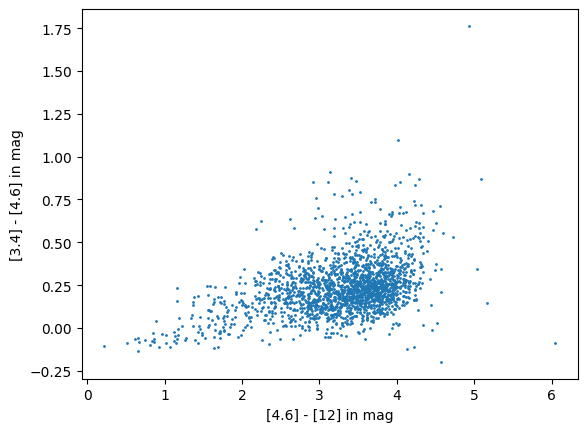

In [12]:
# WISE filters 3.4, 4.6, 12 microns are the w1, w2, w3 columns respectively
x = crossmatched['w2'] - crossmatched['w3']
y = crossmatched['w1'] - crossmatched['w2']

plt.scatter(x, y, s=1)
plt.xlabel('[4.6] - [12] in mag')
plt.ylabel('[3.4] - [4.6] in mag')